###### Задание 3
Выполнил Цветков Сергей


Сравните KNeighborsRegressor и LinearRegression для набора данных, полученного из некоторой функциональной зависимости с "шумом". Вид зависимости, диапазон изменения х и число значений х выдерете сами

<strong>Регрессия</strong> (использование KNeighborsRegressor Метод К-ближайших соседей в
регрессии)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
# увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

In [3]:
# Задаем диапазон изменения и шаг для функции tan(x)
x = np.linspace(-3, 3, 150)
print(x)

[-3.         -2.95973154 -2.91946309 -2.87919463 -2.83892617 -2.79865772
 -2.75838926 -2.71812081 -2.67785235 -2.63758389 -2.59731544 -2.55704698
 -2.51677852 -2.47651007 -2.43624161 -2.39597315 -2.3557047  -2.31543624
 -2.27516779 -2.23489933 -2.19463087 -2.15436242 -2.11409396 -2.0738255
 -2.03355705 -1.99328859 -1.95302013 -1.91275168 -1.87248322 -1.83221477
 -1.79194631 -1.75167785 -1.7114094  -1.67114094 -1.63087248 -1.59060403
 -1.55033557 -1.51006711 -1.46979866 -1.4295302  -1.38926174 -1.34899329
 -1.30872483 -1.26845638 -1.22818792 -1.18791946 -1.14765101 -1.10738255
 -1.06711409 -1.02684564 -0.98657718 -0.94630872 -0.90604027 -0.86577181
 -0.82550336 -0.7852349  -0.74496644 -0.70469799 -0.66442953 -0.62416107
 -0.58389262 -0.54362416 -0.5033557  -0.46308725 -0.42281879 -0.38255034
 -0.34228188 -0.30201342 -0.26174497 -0.22147651 -0.18120805 -0.1409396
 -0.10067114 -0.06040268 -0.02013423  0.02013423  0.06040268  0.10067114
  0.1409396   0.18120805  0.22147651  0.26174497  0.3

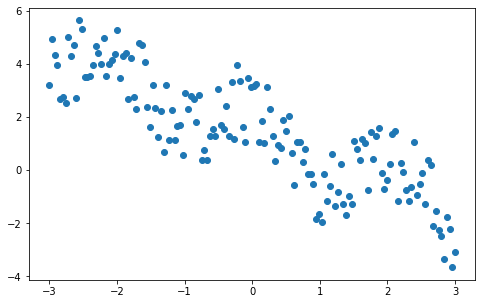

In [4]:
# Определяем y = cos(3 * x) + x со случайными отклонениями
# На этом этапе возможен эксперимент с шумом. Умножим "разброс" на 4 - это ведет к значител
# Устанавливем Kt - "увеличитель" шумности
Kt = 3
rng = np.random.RandomState(42)
y = np.cos(3 * x) - x + Kt * rng.uniform(size=len(x))
# Строим график
plt.plot(x, y, 'o')

In [5]:
# Преобразуем Х в двумерный массив
print(x.shape)
X = x[:, np.newaxis]
print(X.shape)

(150,)
(150, 1)


In [6]:
# Делим данные на обучающий и тернировочный наборы
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

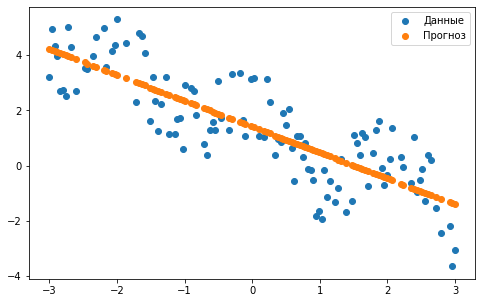

In [7]:
# Проводим обучение на тренировочном наборе
y_pred_train = regressor.predict(X_train)
# Выводим зависомость
plt.plot(X_train, y_train, 'o', label="Данные")
plt.plot(X_train, y_pred_train, 'o', label="Прогноз")
plt.legend(loc='best')

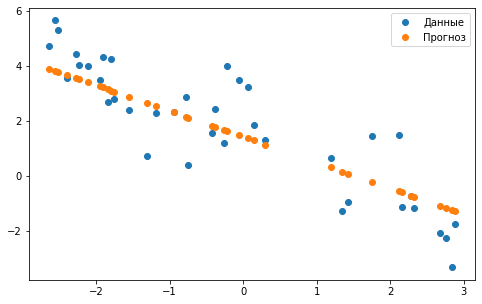

In [8]:
y_pred_test = regressor.predict(X_test)
# Выводим зависомость
plt.plot(X_test, y_test, 'o', label="Данные")
plt.plot(X_test, y_pred_test, 'o', label="Прогноз")
plt.legend(loc='best')

In [9]:
# Оценка качества предсказаний
regressor.score(X_test, y_test)

0.7535206845516569

Качество предсказаний неудовлетворительное - меньше 0.85

#### Метод ближайших соседей

In [10]:
from sklearn.neighbors import KNeighborsRegressor
kneighbor_regression = KNeighborsRegressor(n_neighbors=1)
kneighbor_regression.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

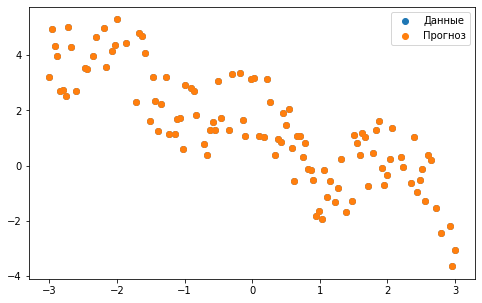

In [11]:
# Делим выборку на тренировочную и тестовую
y_pred_train = kneighbor_regression.predict(X_train)
plt.plot(X_train, y_train, 'o', label="Данные")
plt.plot(X_train, y_pred_train, 'o', label="Прогноз")
plt.legend(loc='best')

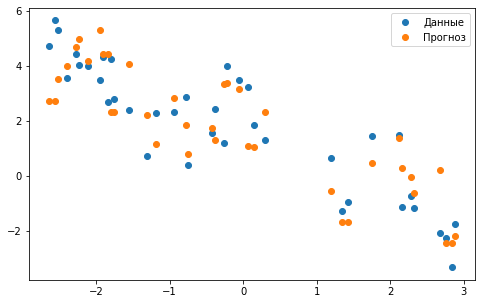

In [12]:
y_pred_test = kneighbor_regression.predict(X_test)
plt.plot(X_test, y_test, 'o', label="Данные")
plt.plot(X_test, y_pred_test, 'o', label="Прогноз")
plt.legend(loc='best')

In [13]:
# Оцениваем качество предсказаний
kneighbor_regression.score(X_test, y_test)

0.7024947854042514

Качество предсказаний неудовлетворительное - меньше 0.85

#### Вывод
При увеличение "шума" в зависимости значительно ухудшается КАЧЕСТВО предсказаний.